In [44]:
from db_helper import DBHelper
import datetime
import networkx as nx
from node2vec import Node2Vec
from datetime import datetime

In [3]:
MONTH_TAG="month"
YEAR_TAG="year"
DAY_TAG="day"

MONTHS = {1:"JAN",2:"FEB",3:"MAR",4:"APR",
          5:"MAY",6:"JUN",7:"JUL",8:"AUG",
         9:"SEP",10:"OCT",11:"NOV",12:"DEC"}

In [4]:
db = DBHelper()
db.connect(user="root",passwd="Hasan5695*",db="cse496")

In [5]:
tweets = db.getTweets("denemeShort")
tweets.sort(key=lambda t: t.date)

In [6]:
#Print first tweet
print("ExampleSentName:",tweets[0].sentName)
print("ExampleText:",tweets[0].text)
print("ExampleDate:",tweets[0].date)

ExampleSentName: osmancoskungazi
ExampleText: Hayat bu, bir bakarsın herşey bir anda son bulur.
 Hayat bu, son dediğin an herşey yeniden can bulur..Şemsi Tebrizi
ExampleDate: 2013-06-25 16:24:47


In [7]:
# Print sorted tweets
"""
for i in range(0,100):
    print("ExampleSentName:",tweets[i].sentName)
    print("ExampleText:",tweets[i].text)
    print("ExampleDate:",tweets[i].date)
    print("ExampleDateStr",tweets[i].dateStr)
"""


'\nfor i in range(0,100):\n    print("ExampleSentName:",tweets[i].sentName)\n    print("ExampleText:",tweets[i].text)\n    print("ExampleDate:",tweets[i].date)\n    print("ExampleDateStr",tweets[i].dateStr)\n'

In [27]:
G3 = nx.Graph()
G3.add_node(YEAR_TAG)
G3.add_node(MONTH_TAG)
G3.add_node(DAY_TAG)
#nx.draw(G,width=0.5,node_size=80,font_size=8,with_labels=True)

In [46]:
# Draw Graph According to Page3
startTime = datetime.now()
#for i in range(0,10000):
#    tweet = tweets[i]
for tweet in tweets:
    # connect Year edges
    G3.add_edge(tweet.date.year,MONTHS[tweet.date.month])
    G3.add_edge(tweet.date.year,YEAR_TAG)
    # connect month edges
    G3.add_edge(MONTHS[tweet.date.month],MONTH_TAG)
    G3.add_edge(MONTHS[tweet.date.month],tweet.date.day)
    # connect day edges
    G3.add_edge(tweet.date.day,DAY_TAG)
endTime = datetime.now()
print("Time3 Graph construct time: ",endTime-startTime)
print("Number of edges: ",G3.number_of_edges())
print("Number of nodes: ",G3.number_of_nodes())

Time3 Graph construct time:  0:00:00.702482
Number of edges:  465
Number of nodes:  51


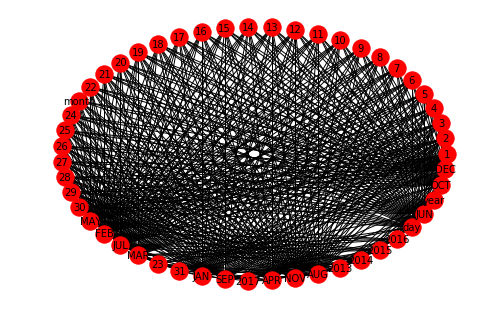

In [47]:
pos=nx.circular_layout(G3)
#nx.draw(G3,width=1,node_size=300,font_size=10,with_labels=True)
nx.draw(G3,pos,node_size=300,font_size=10,with_labels=True)

In [48]:
# train, create new node2ve model
time3N2V = Node2Vec(G3, dimensions=64, walk_length=2, num_walks=100, workers=3) 

Generating walks (CPU: 3): 100%|██████████| 33/33 [00:00<00:00, 365.24it/s]


In [92]:
# run/fit word2vec algorithm and get wv model
model3 = time3N2V.fit(window=10, min_count=1, batch_words=4)

In [93]:
model3.wv.save_word2vec_format("../outputs/time3_vw_format.model")

# Save model for later use
model3.save("../outputs/time3.model")

In [94]:
model3.wv.most_similar("2015")

[('day', 0.4885900318622589),
 ('FEB', 0.4299049377441406),
 ('OCT', 0.42909669876098633),
 ('MAR', 0.41670817136764526),
 ('JAN', 0.4120365083217621),
 ('10', 0.40433406829833984),
 ('APR', 0.3932379484176636),
 ('AUG', 0.3792323172092438),
 ('JUL', 0.37839725613594055),
 ('NOV', 0.36852893233299255)]

In [65]:
# Draw Graph According to Page1
G1 = nx.DiGraph()
G1.add_node(YEAR_TAG)
G1.add_node(MONTH_TAG)

In [66]:
prevYear = None
prevMonth = None

prevYear = tweets[0].date.year
prevMonth = tweets[0].date.month

# Get random sorted tweets and draw graph
startTime = datetime.now()
#for i in range(0,10000,1000):
#    tweet = tweets[i]
for tweet in tweets:
    #print(tweet.date.year," ",tweet.date.month," ",tweet.date.day)
            
    G1.add_edge(YEAR_TAG,tweet.date.year,weight=tweet.date.year)
    
    if(prevYear < tweet.date.year):
        G1.add_edge(prevYear,tweet.date.year)
        prevYear = tweet.date.year
        prevMonth = tweet.date.month
        
    monthFormat = "{month} {year}".format(month=MONTHS[tweet.date.month],year=tweet.date.year)
    if(prevMonth < tweet.date.month):
        prevMonthFormat = "{month} {year}".format(month=MONTHS[prevMonth],year=tweet.date.year)
        G1.add_edge(prevMonthFormat,monthFormat)
        prevMonth = tweet.date.month
    
    G1.add_edge(tweet.date.year,monthFormat)
    
    G1.add_edge(MONTH_TAG,monthFormat,month=tweet.date.month, year=tweet.date.year)
endTime = datetime.now()
print("Time1 Graph construct time: ",endTime-startTime)
print("Number of edges: ",G3.number_of_edges())
print("Number of nodes: ",G3.number_of_nodes())

Time1 Graph construct time:  0:00:00.671450
Number of edges:  465
Number of nodes:  51


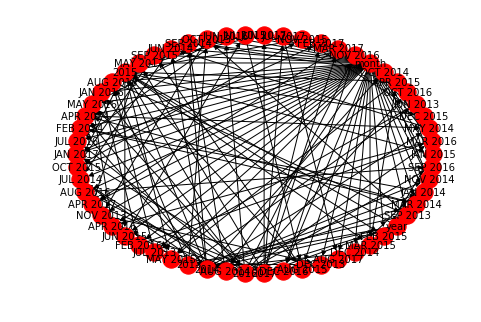

In [69]:
pos=nx.circular_layout(G1)
#nx.draw(G3,width=1,node_size=300,font_size=10,with_labels=True)
nx.draw(G1,pos,node_size=300,font_size=10,with_labels=True)

In [85]:
# train, create new node2ve model
time1N2V = Node2Vec(G1, dimensions=64, walk_length=1, num_walks=100, workers=3) 

Generating walks (CPU: 3): 100%|██████████| 33/33 [00:00<00:00, 1924.39it/s]


In [86]:
# run/fit word2vec algorithm and get wv model
model = time1N2V.fit(window=10, min_count=1, batch_words=4)

In [87]:
model.wv.save_word2vec_format("../outputs/time1_vw_format.model")

# Save model for later use
model.save("../outputs/time1.model")

In [88]:
model.wv.most_similar("2015")

[('JUL 2016', 0.25398993492126465),
 ('OCT 2013', 0.16499145328998566),
 ('JAN 2017', 0.16041789948940277),
 ('JUL 2014', 0.1558835804462433),
 ('JUN 2013', 0.12861104309558868),
 ('NOV 2013', 0.12084641307592392),
 ('NOV 2015', 0.11987316608428955),
 ('SEP 2015', 0.11323781311511993),
 ('AUG 2015', 0.09684406220912933),
 ('DEC 2016', 0.08969515562057495)]

In [90]:
G1[2015]

AtlasView({2016: {}, 'JAN 2015': {}, 'NOV 2015': {}, 'DEC 2015': {}, 'AUG 2015': {}, 'OCT 2015': {}, 'JUL 2015': {}, 'MAR 2015': {}, 'FEB 2015': {}, 'APR 2015': {}, 'JUN 2015': {}, 'MAY 2015': {}, 'SEP 2015': {}})